# Spaceship Titanic
Predict which passengers are transported to an alternate dimension

## Знакомство с имеющимися данными
Загружаем таблички с данными о пассажирах, изучаем информацию, смотрим, какие признаки имеются.


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import classification_report

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Профильный модуль/гп2kaggle/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Профильный модуль/гп2kaggle/test.csv')

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df_train.describe(include=['object', 'bool'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


In [ ]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
df_test.describe(include=['object', 'bool'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


In [ ]:
print(f'Количество дубликатов в тестовой выборке: {df_train.duplicated().sum()}')
print(f'Количество дубликатов в тестовой выборке: {df_test.duplicated().sum()}')

Количество дубликатов в тестовой выборке: 0
Количество дубликатов в тестовой выборке: 0


In [ ]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Что мы имеем:

*   13 признаков, 1 целевая переменная
*   не очень много NaN, значит можно их заполнить модами
*   не все данные являются числовыми, а для некоторых моделей это недопустимо
*   дубликатов нет










## Очистка и подготовка данных
Убираем ненужные столбцы, заполняем NaN, приводим всё к числовому формату

In [ ]:
#уберем ненужные столбцы
df_train.drop(columns =  'Name', inplace = True)
df_test.drop(columns = 'Name', inplace = True)

In [ ]:
#разделим столбец Cabin на 3 и PassengerId на 2, затем удалим их
df_train_cab = df_train['Cabin'].str.split('/', expand = True)
df_test_cab = df_test['Cabin'].str.split('/', expand = True)

df_train_cab.rename(columns ={0:'Deck', 1:'Num', 2:'Side'}, inplace = True)
df_test_cab.rename(columns ={0:'Deck', 1:'Num', 2:'Side'}, inplace = True)

df_train_id = df_train['PassengerId'].str.split('_', expand = True)
df_test_id = df_test['PassengerId'].str.split('_', expand = True)

df_train_id.rename(columns ={0:'Group', 1:'Pp'}, inplace = True)
df_test_id.rename(columns ={0:'Group', 1:'Pp'}, inplace = True)

In [ ]:
df_train = pd.merge(df_train, df_train_cab, how='left', right_index=True, left_index=True)
df_test = pd.merge(df_test, df_test_cab, how='left', right_index=True, left_index=True)

In [ ]:
df_train = pd.merge(df_train, df_train_id, how='left', right_index=True, left_index=True)
df_test = pd.merge(df_test, df_test_id, how='left', right_index=True, left_index=True)

In [ ]:
df_train.drop(columns = ['Cabin', 'PassengerId'], inplace=True)
df_test.drop(columns = ['Cabin', 'PassengerId'], inplace=True)

In [ ]:
#заполним NaN модами
modes_train = df_train.mode().iloc[0]
modes_test = df_test.mode().iloc[0]

In [ ]:
modes_train

HomePlanet            Earth
CryoSleep             False
Destination     TRAPPIST-1e
Age                    24.0
VIP                   False
RoomService             0.0
FoodCourt               0.0
ShoppingMall            0.0
Spa                     0.0
VRDeck                  0.0
Transported            True
Deck                      F
Num                      82
Side                      S
Group                  0984
Pp                       01
Name: 0, dtype: object

In [ ]:
df_train.fillna(modes_train, inplace=True)
df_test.fillna(modes_test, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  Num           8693 non-null   object 
 13  Side          8693 non-null   object 
 14  Group         8693 non-null   object 
 15  Pp            8693 non-null   object 
dtypes: bool(3), float64(6), object(7)
memory usage: 908.5+ KB


In [ ]:
#преобразуем все столбцы к числовому формату
df_train = df_train.astype({'Num':'int',
                            'Group':'int',
                            'Pp':'int'})
df_test = df_test.astype({'Num':'float',
                          'Group':'int',
                          'Pp':'int'})

le_train = LabelEncoder()
clmns = ['HomePlanet', 'Destination', 'Deck', 'Side']
for clmn in clmns:
  le_train.fit(df_train[clmn])
  df_train[clmn] = le_train.transform(df_train[clmn])

le_test = LabelEncoder()
for clmn in clmns:
  le_test.fit(df_test[clmn])
  df_test[clmn] = le_test.transform(df_test[clmn])

In [ ]:
df_train = df_train.replace({True:1, False:0})
df_test = df_test.replace({True:1, False:0})

## Визуализация

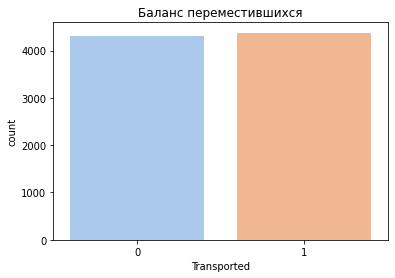

In [ ]:
sns.countplot(data=df_train, x='Transported', palette='pastel').set(title='Баланс переместившихся')
plt.show()

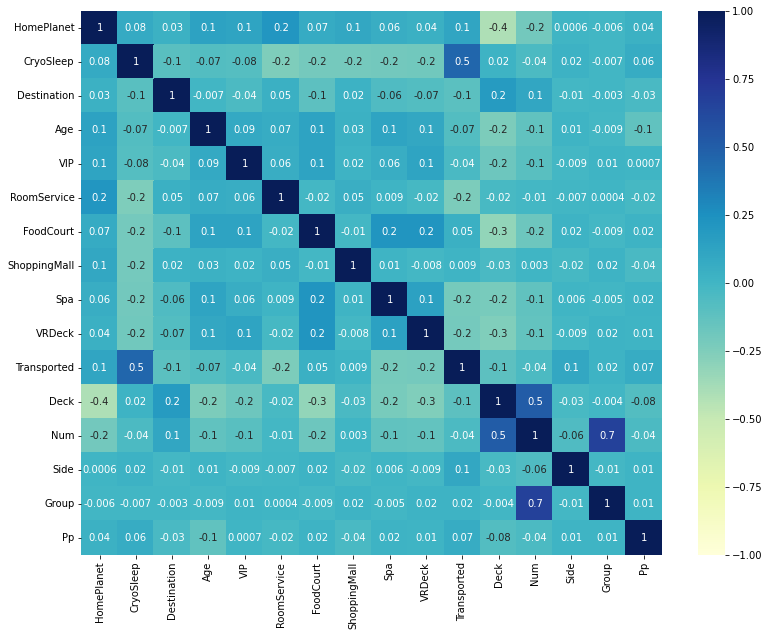

In [ ]:
#посмотрим на heatmap, чтобы проанализировать корреляцию признаков друг с другом и с целевой переменной
plt.figure(figsize=(13,10))

sns.heatmap(df_train.corr(), 
            xticklabels=df_train.columns, 
            yticklabels=df_train.columns, 
            annot = True, 
            fmt='.1g', 
            vmin=-1,
            cmap= 'YlGnBu')

plt.show()

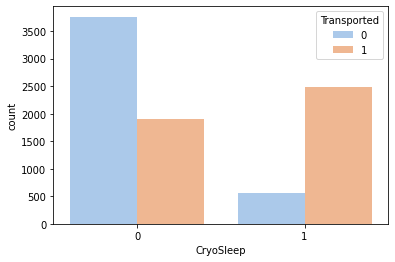

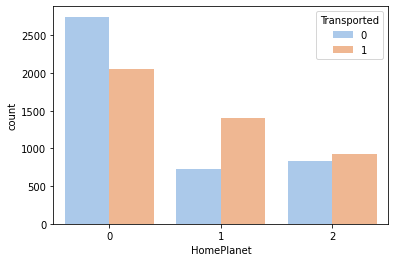

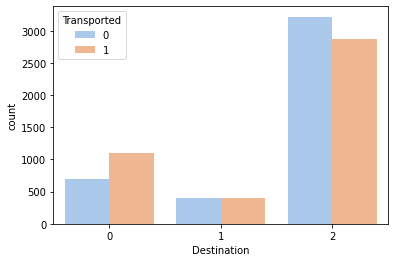

In [ ]:
high_corr = ['CryoSleep', 'HomePlanet', 'Destination']
for clmn in high_corr:
  sns.countplot(data=df_train, x=clmn, hue='Transported', palette='pastel')
  plt.show()

## Построение Baseline
Создадим несколько разных моделей, посмотрим, какая лучше справляется.

In [ ]:
X = df_train.drop('Transported',axis = 1)
y = df_train['Transported']

In [ ]:
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

### CatBoost

In [ ]:
cb_model = cb.CatBoostClassifier(verbose=0)
cb_model.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, cb_model.predict(X_test)))
print(classification_report(y_train, cb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       863
           1       0.81      0.82      0.82       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3452
           1       0.87      0.88      0.88      3502

    accuracy                           0.88      6954
   macro avg       0.88      0.88      0.88      6954
weighted avg       0.88      0.88      0.88      6954



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model= KNeighborsClassifier(13)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
print(classification_report(y_test, knn_model.predict(X_test)))
print(classification_report(y_train, knn_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       863
           1       0.76      0.80      0.78       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3452
           1       0.78      0.84      0.81      3502

    accuracy                           0.80      6954
   macro avg       0.80      0.80      0.80      6954
weighted avg       0.80      0.80      0.80      6954



### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logreg = LogisticRegression(max_iter=1500)
model_logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1500)

In [ ]:
print(classification_report(y_test, model_logreg.predict(X_test)))
print(classification_report(y_train, model_logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       863
           1       0.79      0.80      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      3452
           1       0.78      0.81      0.79      3502

    accuracy                           0.79      6954
   macro avg       0.79      0.79      0.79      6954
weighted avg       0.79      0.79      0.79      6954



### Stochastic Gradient Descent



In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model_sgd = SGDClassifier()
model_sgd.fit(X_train, y_train)

SGDClassifier()

In [ ]:
print(classification_report(y_test, model_sgd.predict(X_test)))
print(classification_report(y_train, model_sgd.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       863
           1       0.74      0.78      0.76       876

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      3452
           1       0.74      0.79      0.76      3502

    accuracy                           0.75      6954
   macro avg       0.76      0.75      0.75      6954
weighted avg       0.76      0.75      0.75      6954



### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gbc = GradientBoostingClassifier(learning_rate=0.3, max_depth=1, random_state=8)
model_gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=1, random_state=8)

In [ ]:
print(classification_report(y_test, model_gbc.predict(X_test)))
print(classification_report(y_train, model_gbc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       863
           1       0.80      0.79      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3452
           1       0.80      0.82      0.81      3502

    accuracy                           0.80      6954
   macro avg       0.80      0.80      0.80      6954
weighted avg       0.80      0.80      0.80      6954



### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=7)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
print(classification_report(y_test, model_dt.predict(X_test)))
print(classification_report(y_train, model_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       863
           1       0.75      0.84      0.79       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

              precision    recall  f1-score   support

           0       0.84      0.72      0.77      3452
           1       0.76      0.87      0.81      3502

    accuracy                           0.79      6954
   macro avg       0.80      0.79      0.79      6954
weighted avg       0.80      0.79      0.79      6954



### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model_bc = BaggingClassifier()
model_bc.fit(X_train, y_train)

BaggingClassifier()

In [ ]:
print(classification_report(y_test, model_bc.predict(X_test)))
print(classification_report(y_train, model_bc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       863
           1       0.83      0.73      0.78       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3452
           1       0.99      0.98      0.99      3502

    accuracy                           0.99      6954
   macro avg       0.99      0.99      0.99      6954
weighted avg       0.99      0.99      0.99      6954



### Выбор модели

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
models = [cb_model, knn_model, model_logreg, model_sgd, model_gbc, model_dt, model_bc]
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models]
names = ['CatBoost', 'KNN', 'LogisticRegression', 'Stochastic Gradient Descent', 'GradientBoostingClassifier', 'DecisionTree', 'BaggingClassifier']
results = pd.DataFrame(list(zip(names, accuracy)), columns = ['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)

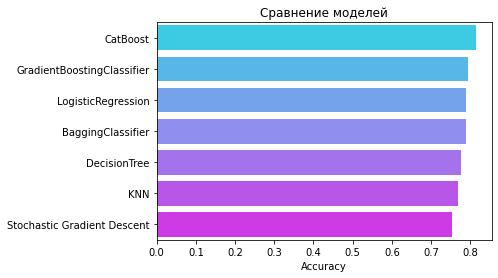

In [ ]:
sns.barplot(data=results, x='Accuracy', y='Model', orient='h', palette='cool').set(title='Сравнение моделей', ylabel='', xlabel='Accuracy')
plt.show()

## Работа с признаками
Теперь более подробно изучим признаки и посмотрим, что можно сделать для улучшения качества предсказания.

In [ ]:
imp_feat = pd.DataFrame({'feature':X_train.columns,'importance':cb_model.feature_importances_}).sort_values(by='importance',ascending=False)

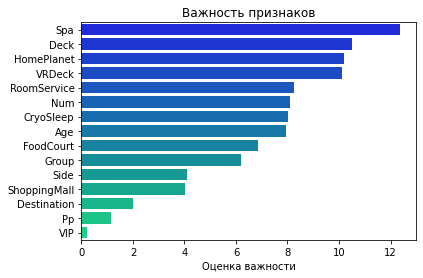

In [ ]:
sns.barplot(data=imp_feat, y='feature', x='importance', orient='h', palette='winter').set(title='Важность признаков', ylabel='', xlabel='Оценка важности')
plt.show()


In [ ]:
df_train.drop(columns = ['VIP', 'Pp'], inplace=True)
df_test.drop(columns = ['VIP', 'Pp'], inplace=True)

In [ ]:
X_1 = df_train.drop('Transported',axis = 1)
y_1 = df_train['Transported']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=42, test_size=0.2, stratify=y)

In [ ]:
cb_model_1 = cb.CatBoostClassifier(verbose=0)
cb_model_1.fit(X_train_1, y_train_1)

In [ ]:
print(classification_report(y_test_1, cb_model_1.predict(X_test_1)))
print(classification_report(y_train_1, cb_model_1.predict(X_train_1)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       863
           1       0.81      0.82      0.82       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3452
           1       0.87      0.88      0.88      3502

    accuracy                           0.88      6954
   macro avg       0.88      0.88      0.88      6954
weighted avg       0.88      0.88      0.88      6954



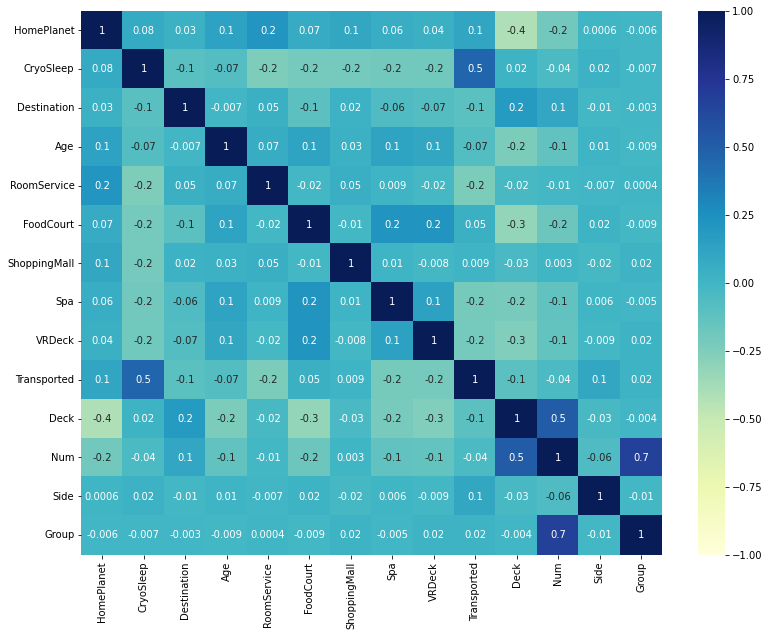

In [ ]:
plt.figure(figsize=(13,10))

sns.heatmap(df_train.corr(), 
            xticklabels=df_train.columns, 
            yticklabels=df_train.columns, 
            annot = True, 
            fmt='.1g', 
            vmin=-1,
            cmap= 'YlGnBu')

plt.show()

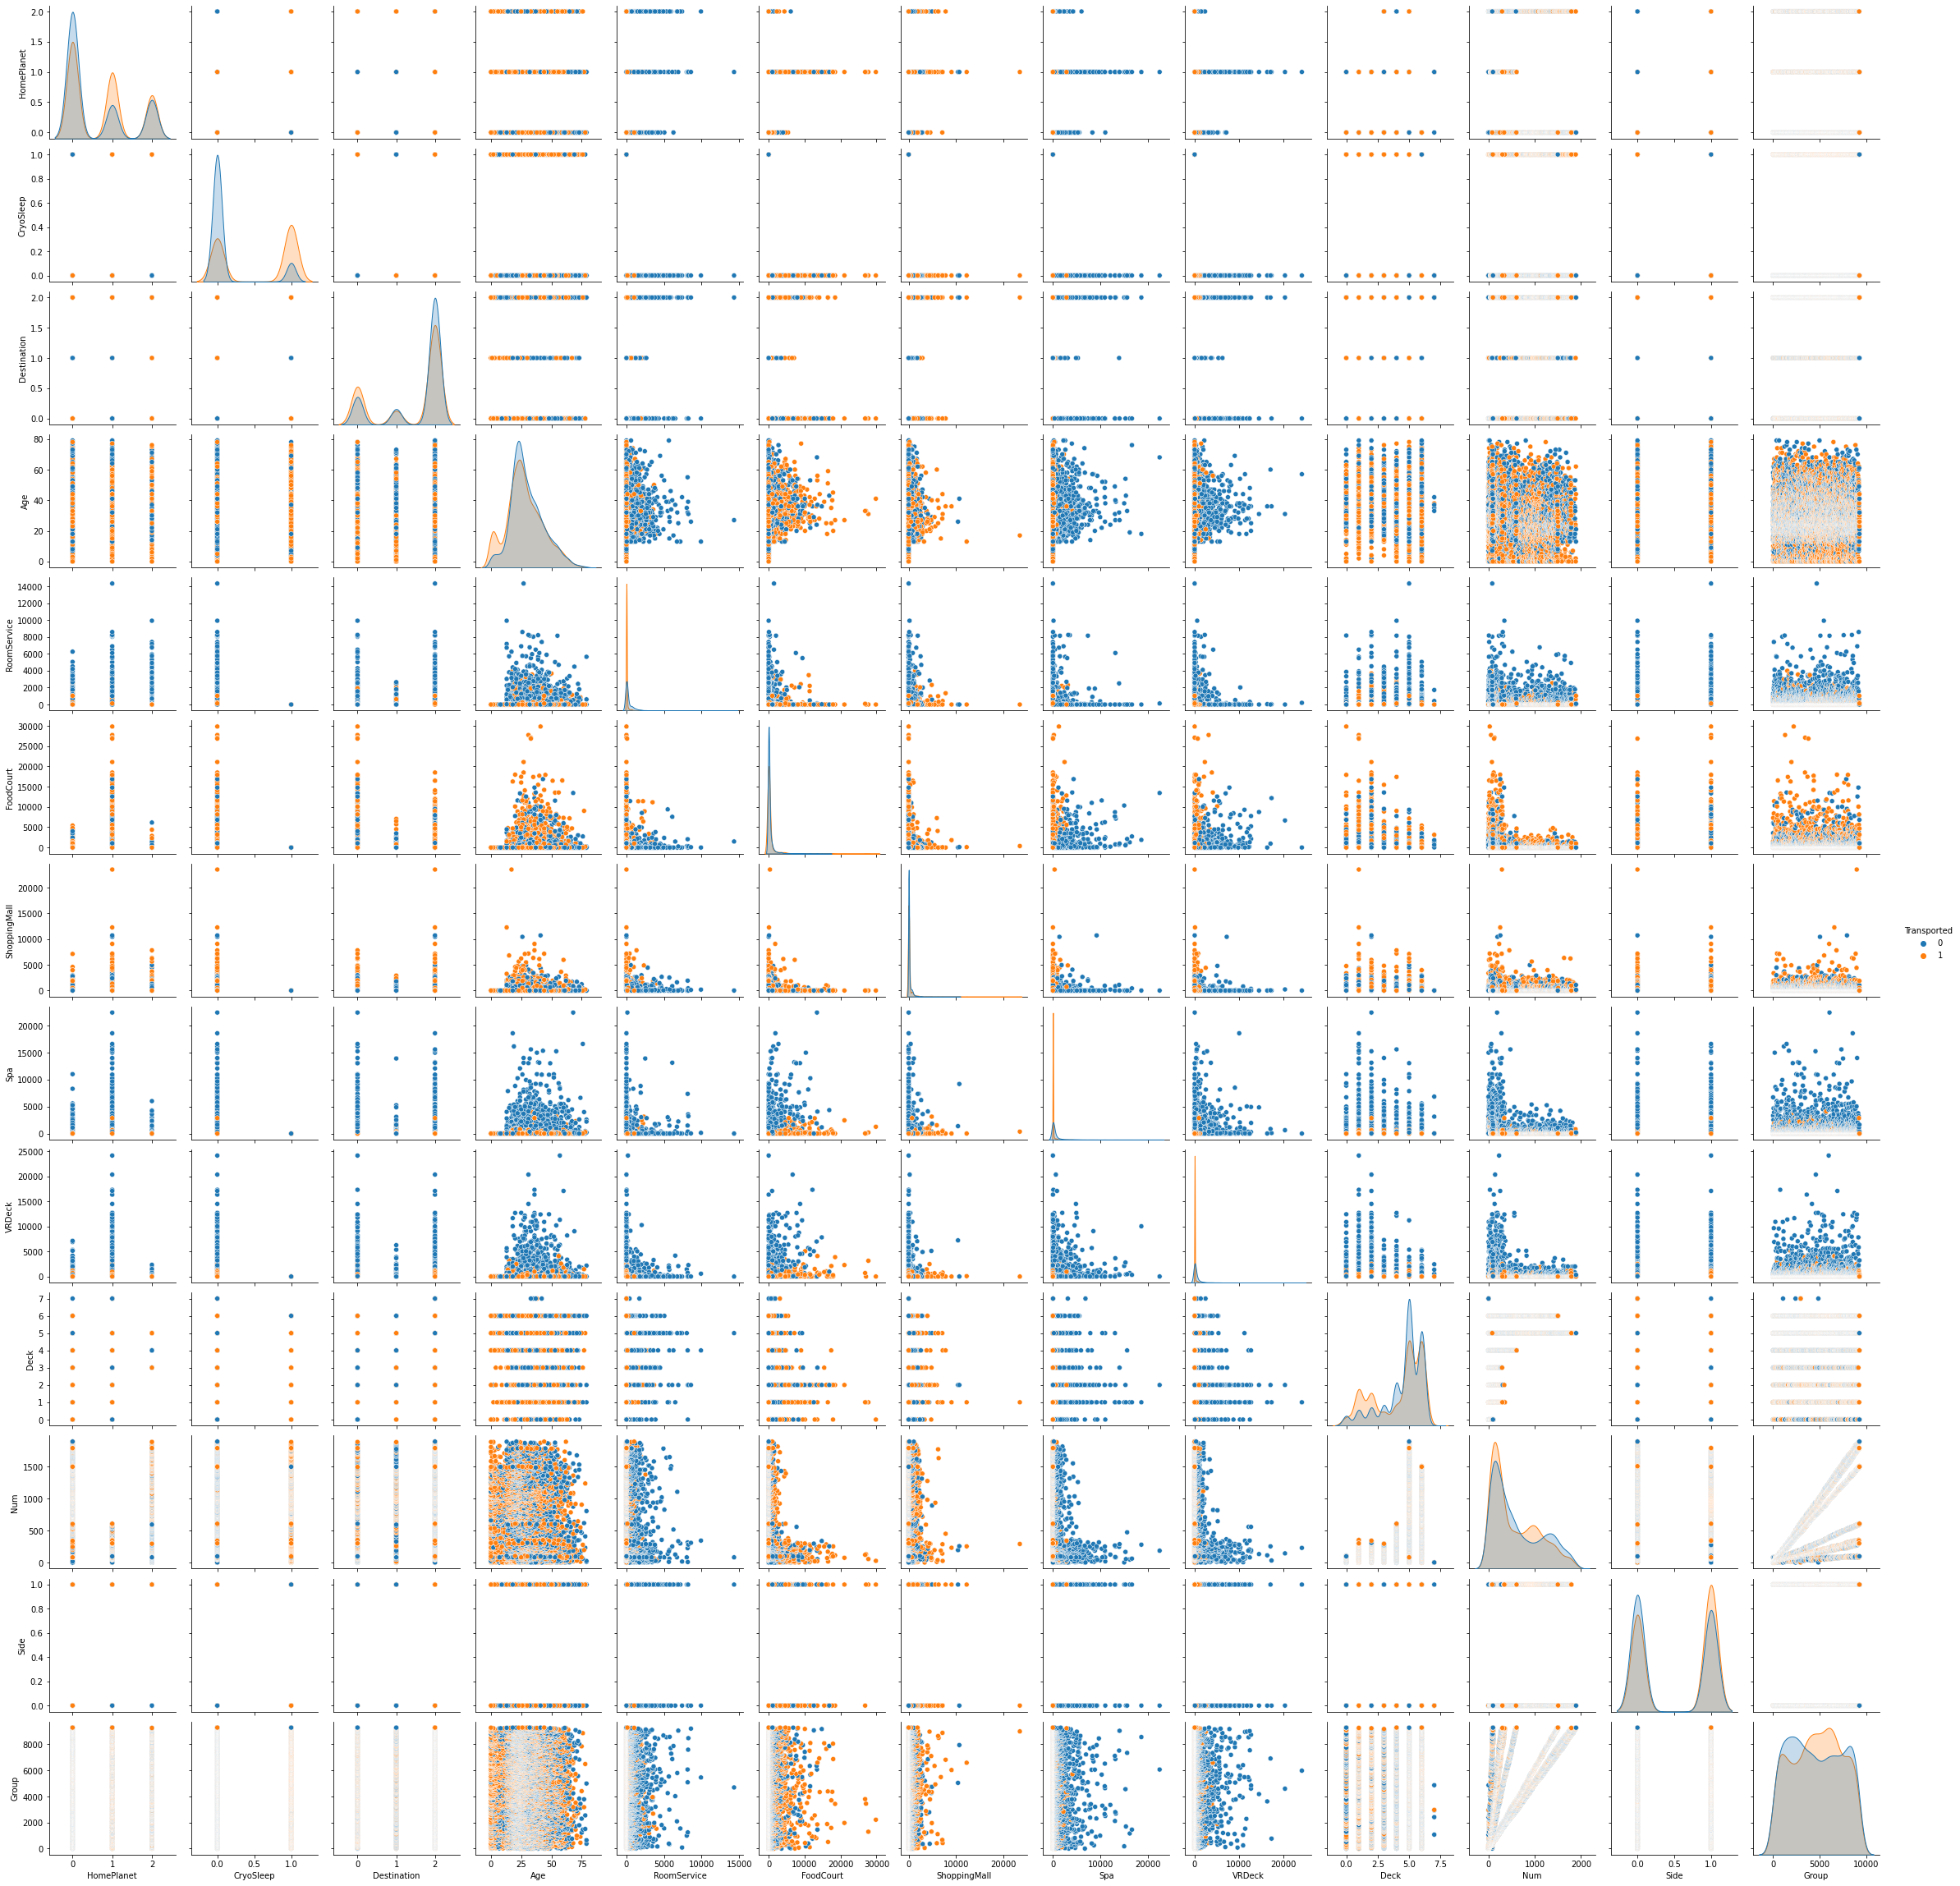

In [ ]:
#sns.pairplot(df_train, hue='Transported')

In [ ]:
df_train['TotalBill'] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df_test['TotalBill'] = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Group,TotalBill
0,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
1,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,2,736.0
2,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,3,10383.0
3,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,3,5176.0
4,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,4,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,98,0,9276,8536.0
8689,0,1,1,18.0,0.0,0.0,0.0,0.0,0.0,0,6,1499,1,9278,0.0
8690,0,0,2,26.0,0.0,0.0,1872.0,1.0,0.0,1,6,1500,1,9279,1873.0
8691,1,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,4,608,1,9280,4637.0


In [ ]:
X_3 = df_train.drop('Transported',axis = 1)
y_3 = df_train['Transported']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=42, test_size=0.2, stratify=y)

cb_model_3 = cb.CatBoostClassifier(verbose=0)
cb_model_3.fit(X_train_3, y_train_3)

print(classification_report(y_test_3, cb_model_3.predict(X_test_3)))
print(classification_report(y_train_3, cb_model_3.predict(X_train_3)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       863
           1       0.81      0.83      0.82       876

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3452
           1       0.87      0.89      0.88      3502

    accuracy                           0.88      6954
   macro avg       0.88      0.88      0.88      6954
weighted avg       0.88      0.88      0.88      6954



In [ ]:
df_train_tmp = df_train.copy()

In [ ]:
df_train_tmp.drop(columns = ['CryoSleep'], inplace=True)

In [ ]:
X_3 = df_train_tmp.drop('Transported',axis = 1)
y_3 = df_train_tmp['Transported']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=42, test_size=0.2, stratify=y)

cb_model_3 = cb.CatBoostClassifier(verbose=0)
cb_model_3.fit(X_train_3, y_train_3)

print(classification_report(y_test_3, cb_model_3.predict(X_test_3)))
print(classification_report(y_train_3, cb_model_3.predict(X_train_3)))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       863
           1       0.81      0.82      0.82       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3452
           1       0.87      0.89      0.88      3502

    accuracy                           0.88      6954
   macro avg       0.88      0.88      0.88      6954
weighted avg       0.88      0.88      0.88      6954



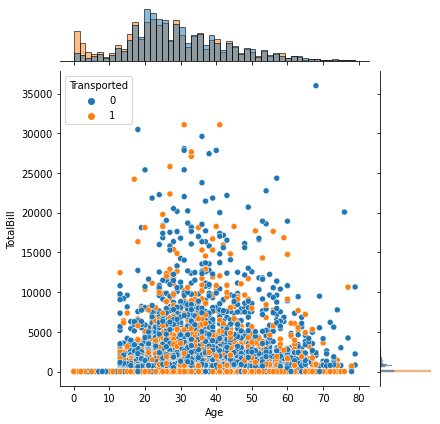

In [ ]:
sns.JointGrid(data=df_train, x='Age', y='TotalBill', hue='Transported').plot(sns.scatterplot, sns.histplot)
plt.show()

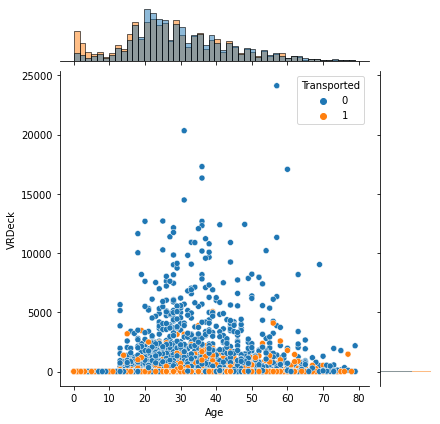

In [ ]:
sns.JointGrid(data=df_train, x='Age', y='VRDeck', hue='Transported').plot(sns.scatterplot, sns.histplot)
plt.show()

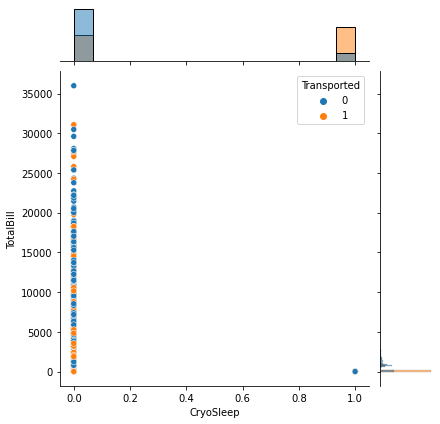

In [ ]:
sns.JointGrid(data=df_train, x='CryoSleep', y='TotalBill', hue='Transported').plot(sns.scatterplot, sns.histplot)
plt.show()

In [ ]:
sns.JointGrid(data=df_train, x='CryoSleep', y='TotalBill', hue='Transported').plot(sns.scatterplot, sns.histplot)
plt.show()

In [ ]:
df_train_tmp = df_train.copy()

In [ ]:
df_train_tmp = df_train_tmp.query('Transported == 1')

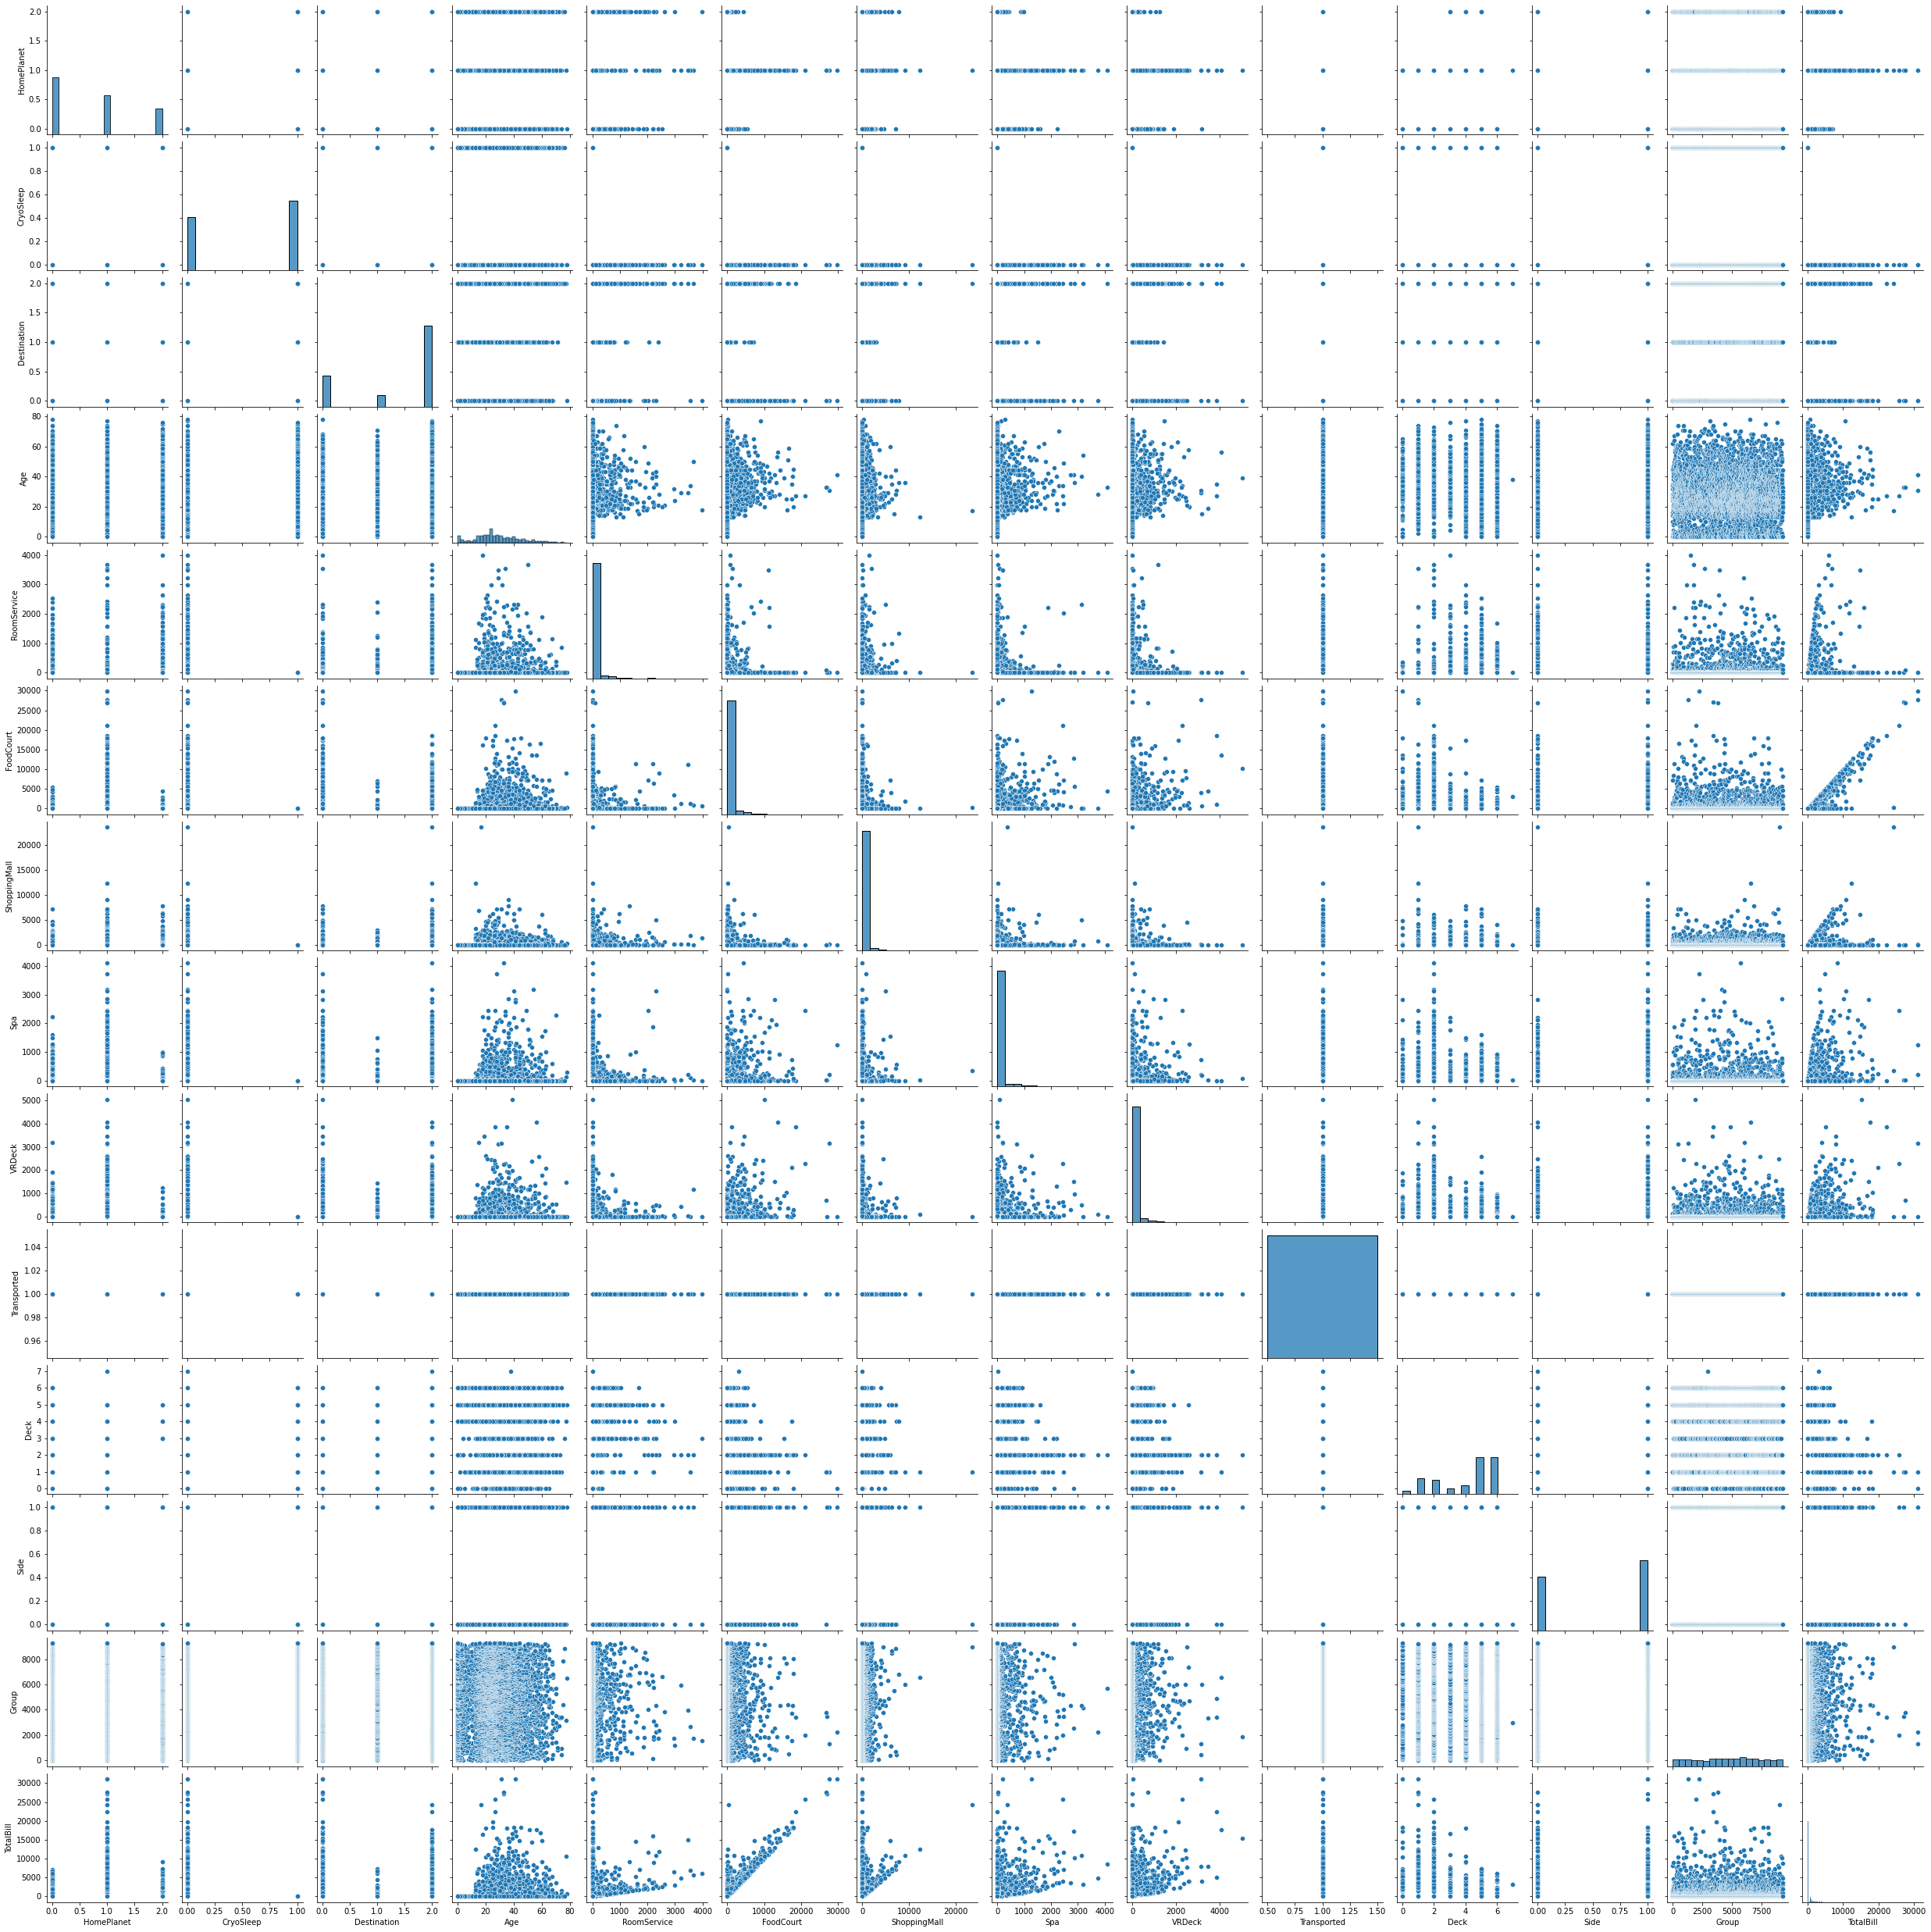

In [ ]:
sns.pairplot(df_train_tmp)

In [ ]:
df_train_tmp = df_train.copy()

In [ ]:
cb_model_final = cb.CatBoostClassifier(verbose=0)
X = df_train.drop('Transported',axis = 1)
y = df_train['Transported']
cb_model_final.fit(X, y)

In [ ]:
pred = cb_model_final.predict(df_test)

In [ ]:
subm = pd.read_csv('/content/drive/MyDrive/Профильный модуль/гп2kaggle/sample_submission.csv')
subm['Transported'] = pred
subm = subm.replace({1:True, 0:False})
subm.to_csv("final.csv", index=False)

In [ ]:
subm

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
